In [30]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os

## First, I create a dataframe about all the countries

In [31]:
# read the geopandas dataset which contains the geometry(polygons that represent the shape of countries) for every country.
shape = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# read the csv file which contains all the reported shark attacks that occured globaly
df = pd.read_csv('files_for_plots/attacks2.csv')


In [32]:
# df is a new dataframe with countries and the number of shark attacks for each country
df = pd.DataFrame(df['Country'].value_counts())

# I made some changes to the df form in order to merge it with shape dataset
df.reset_index(inplace=True)
df.rename(columns={'index':'name','Country':'Counts'},inplace=True)
df = df.replace('Usa','United States of America')

In [33]:
# merging the two dataframes
shape=shape.merge(df,'left')

## Then, I create a dataframe for the states of USA

In [34]:
# As previous, these are the two dataframes with the geometry and the sark attacks, respectively.

states = gpd.read_file('files_for_plots/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
df2 = pd.read_csv('files_for_plots/attacks2.csv')

In [35]:
# In this case, I keep only the rows with shark attacks that took place in USA.

df2 = df2[df2['Country']=='Usa']

df2 = pd.DataFrame(df2['Area'].value_counts())
df2.reset_index(inplace=True)
df2.rename(columns={'index':'name','Country':'Counts'},inplace=True)
df2.rename(columns={'name':'NAME'},inplace=True)
df2.replace({'CUBA':'Cuba'},inplace=True)

In [36]:
states=states.merge(df2,'left')

# Finally, I use the information of the two dataframes to create the following map.

Text(0.5, 1.0, 'Shark attacks in the world')

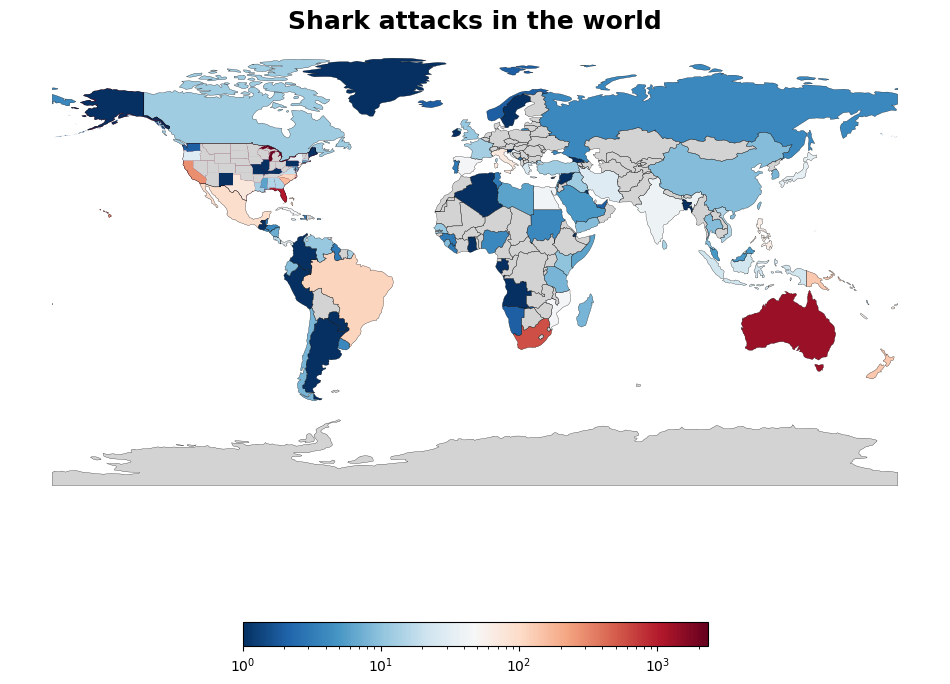

In [37]:
ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(12,10))
shape.plot(ax=ax, 
           column='Counts', 
           legend=True, 
           cmap='RdBu_r', 
           norm=matplotlib.colors.LogNorm(vmin=shape.Counts.min(), vmax=shape.Counts.max()), 
           legend_kwds={'shrink':0.5,'orientation':'horizontal'}, 
           missing_kwds={'color':'lightgrey'})

states.plot(ax=ax, 
           column='Area', 
           cmap='RdBu_r', 
           norm=matplotlib.colors.LogNorm(vmin=shape.Counts.min(), vmax=shape.Counts.max()), 
           missing_kwds={'color':'lightgrey'})


ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right','left','top','bottom']:
    ax.spines[edge].set_visible(False)
    
    
ax.set_title('Shark attacks in the world', size=18, weight='bold')